In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from koe.cluster_analysis_utils import get_clustering_based_on_user_annotation
from koe.model_utils import get_or_error
from koe.models import Database
from koe.sequence_utils import calc_class_ajacency
from koe.storage_utils import get_sids_tids
from root.models import User

database = get_or_error(Database, dict(name='Bellbird_TMI'))
annotator_name = 'wesley'
label_level = 'label'

sids, tids = get_sids_tids(database)
annotator = get_or_error(User, dict(username__iexact=annotator_name))
unique_labels, enum_labels = get_clustering_based_on_user_annotation(annotator, label_level, sids)
nlabels = len(unique_labels)

distmat, _ = calc_class_ajacency(database, label_level, annotator_name, enum_labels, nlabels)

In [4]:
df = pd.DataFrame(distmat, columns=unique_labels, index=unique_labels)

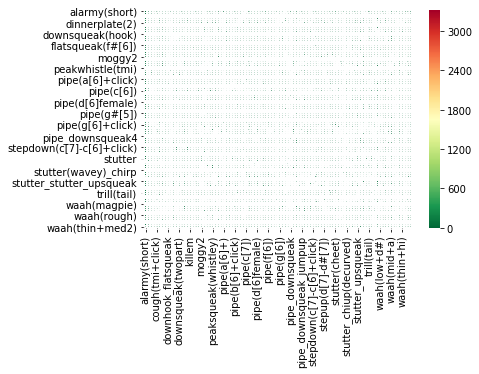

In [5]:
sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [6]:
df.style.background_gradient(cmap='Blues')